In this work, we will use the **glue/sst2** dataset, which is available through tensorflow_datasets.

The General Language Understanding Evaluation (GLUE) benchmark (https://gluebenchmark.com/) is a collection of resources for training, evaluating, and analyzing natural language understanding systems.

These resources include the Stanford Sentiment Treebank (SST) dataset that consists of sentences from movie reviews and human annotations of their sentiment.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
dataset, info = tfds.load('glue/sst2', with_info=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteP1TOU2/glue-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteP1TOU2/glue-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteP1TOU2/glue-test.tfrecord


Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/sst2/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

{'test': <DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>,
 'train': <DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>,
 'validation': <DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>}

In [4]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'idx': tf.int32,
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'sentence': Text(shape=(), dtype=tf.string),
})
2
['negative', 'positive']


In [5]:
dataset_train, dataset_validation = dataset['train'], dataset['validation']
dataset_train

<DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>

In [6]:
# Print some of the entries
for example in dataset_train.take(2):  
  review, label = example["sentence"], example["label"]
  print("Review:", review)
  print("Label: %d \n" % label.numpy())

Review: tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string)
Label: 0 

Review: tf.Tensor(b'like a giant commercial for universal studios , where much of the action takes place ', shape=(), dtype=string)
Label: 0 



In [7]:
# Get the sentences and the labels
# for both the training and the validation sets
training_reviews = []
training_labels = []
 
validation_reviews = []
validation_labels = []

# The dataset has 67,000 training entries, but that's a lot to process here!
# Take 50,000 reviews
for item in dataset_train.take(50000):
  review, label = item["sentence"], item["label"]
  training_reviews.append(str(review.numpy()))
  training_labels.append(label.numpy())

print ("\nNumber of training reviews is: ", len(training_reviews))


Number of training reviews is:  50000


In [8]:
# print some of the reviews and labels
for i in range(0, 10):
  print (training_reviews[i])
  print (training_labels[i])
  print("=============================")

b'for the uninitiated plays better on video with the sound '
0
b'like a giant commercial for universal studios , where much of the action takes place '
0
b'company once again dazzle and delight us '
1
b"'s no surprise that as a director washington demands and receives excellent performances , from himself and from newcomer derek luke "
1
b', this cross-cultural soap opera is painfully formulaic and stilted . '
0
b", the film is n't nearly as downbeat as it sounds , but strikes a tone that 's alternately melancholic , hopeful and strangely funny . "
1
b'only masochistic moviegoers need apply . '
0
b'convince almost everyone that it was put on the screen , just for them '
1
b"like the english patient and the unbearable lightness of being , the hours is one of those reputedly `` unfilmable '' novels that has bucked the odds to emerge as an exquisite motion picture in its own right . "
1
b'his supple understanding of the role '
1


In [9]:
# Get the validation data
# there's only about 800 items

for item in dataset_validation.take(-1):  
  review, label = item["sentence"], item["label"]
  validation_reviews.append(str(review.numpy()))
  validation_labels.append(label.numpy())

print ("\nNumber of validation reviews is: ", len(validation_reviews))


Number of validation reviews is:  872


In [10]:
# Print some of the validation reviews and labels
for i in range(0, 10):
  print (validation_reviews[i])
  print (validation_labels[i])
  print("=============================")

b'a valueless kiddie paean to pro basketball underwritten by the nba . '
0
b"featuring a dangerously seductive performance from the great daniel auteuil , `` sade '' covers the same period as kaufmann 's `` quills '' with more unsettlingly realistic results . "
1
b'i am sorry that i was unable to get the full brunt of the comedy . '
0
b'the inspirational screenplay by mike rich covers a lot of ground , perhaps too much , but ties things together , neatly , by the end . '
1
b"from the opening scenes , it 's clear that all about the benjamins is a totally formulaic movie . "
0
b'exquisitely nuanced in mood tics and dialogue , this chamber drama is superbly acted by the deeply appealing veteran bouquet and the chilling but quite human berling . '
1
b'slick piece of cross-promotion . '
1
b"one of the more intelligent children 's movies to hit theaters this year . "
1
b'but it could have been worse . '
0
b"the movie 's relatively simple plot and uncomplicated morality play well with the aff

In [13]:
# initialize paramters
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index

# Pad the sequences so that they are all the same length
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(validation_reviews)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

training_labels_final = np.array(training_labels)
validation_labels_final = np.array(validation_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            64000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 100
history_cnn = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels_final))

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6597 - accuracy: 0.6001 - val_loss: 0.5998 - val_accuracy: 0.7087
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5524 - accuracy: 0.7347 - val_loss: 0.4885 - val_accuracy: 0.7752
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4642 - accuracy: 0.7946 - val_loss: 0.4526 - val_accuracy: 0.8085
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4108 - accuracy: 0.8165 - val_loss: 0.4532 - val_accuracy: 0.8119
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8296 - val_loss: 0.4618 - val_accuracy: 0.8028
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8359 - val_loss: 0.4779 - val_accuracy: 0.8005
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3419 - accuracy: 0.8406 - val_loss: 0.4956 - val_ac

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

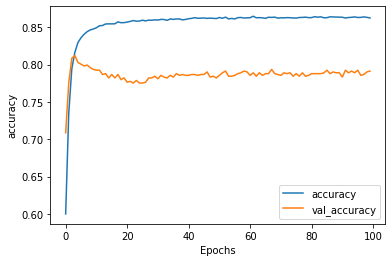

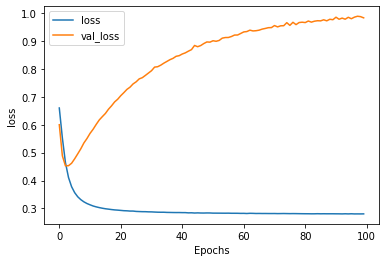

In [17]:
plot_graphs(history_cnn, "accuracy")
plot_graphs(history_cnn, "loss")